<a href="https://colab.research.google.com/github/santoshmahanti/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings    
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading csv from rossman sales data
sales_df=pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Copy of Rossmann Stores Data.csv', parse_dates=['Date'])

In [5]:
#checking shape of data
sales_df.shape

(1017209, 9)

In [6]:
#getting first few rows of data
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
# getting info for sales dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
# checking description of dataframe
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# number of null values in sales dataframe
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
#reading csv from rossman stores data
store_df=pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Copy of store.csv')

In [11]:
#getting first few rows of data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
# checking description of dataframe
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
# getting info for sales dataframe
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


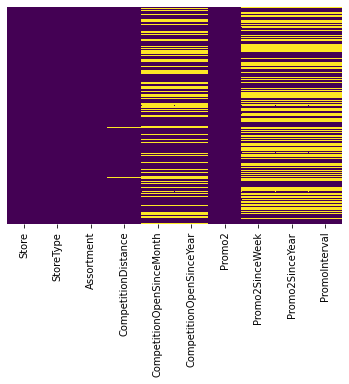

In [14]:
# visualisation of null values using heatmap
sns.heatmap(store_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# number of null values in stores dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
# checking the percentage of missing values in stores dataframe
features_with_na = [features for features in store_df.columns if store_df[features].isnull().sum()>=1]
for feature in features_with_na:
  print(feature,np.around(store_df[feature].isnull().mean(),4), ' % missing values')


CompetitionDistance 0.0027  % missing values
CompetitionOpenSinceMonth 0.3175  % missing values
CompetitionOpenSinceYear 0.3175  % missing values
Promo2SinceWeek 0.4879  % missing values
Promo2SinceYear 0.4879  % missing values
PromoInterval 0.4879  % missing values


In [17]:
df = sales_df.merge(right = store_df, how='left', on='Store')

In [18]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


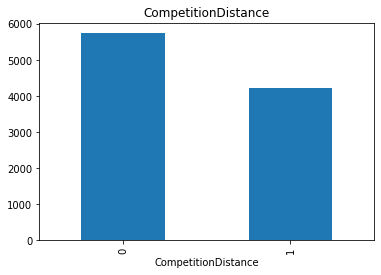

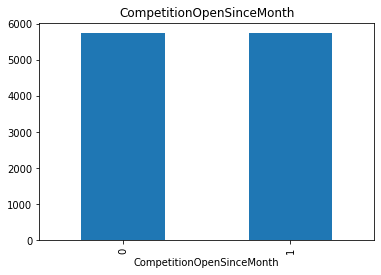

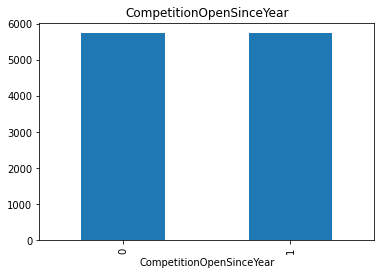

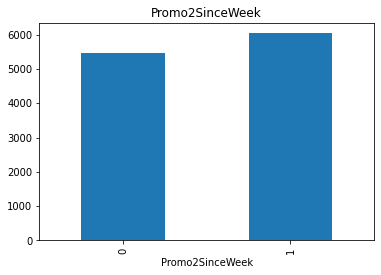

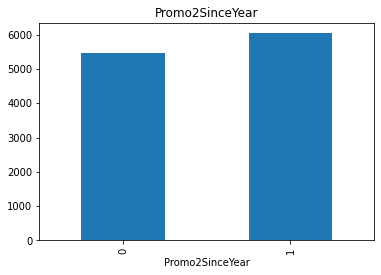

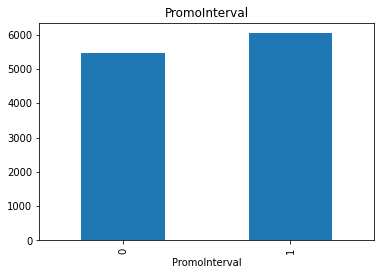

In [19]:
# To check if null values in feature are influencing the sales data
for feature in features_with_na:
  data= df.copy()
  data[feature]= np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['Sales'].median().plot.bar()
  plt.title(feature)
  plt.show()

Since competition distance only has three null values, but has a standard deviation of around 7663 points, it might be heavily influenced by outliers. Checking that with the help of a boxplot.

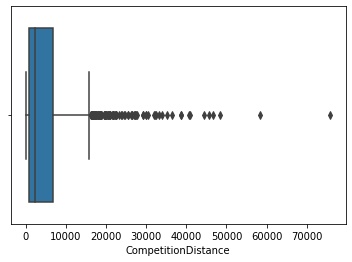

In [20]:
# Visualisation of outliers using  boxplot for competition distance
sns.boxplot(store_df['CompetitionDistance'])

In [21]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [22]:
store_df['CompetitionDistance'].isnull().sum()

0

In [23]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [24]:
store_df['CompetitionOpenSinceMonth'].isnull().sum()

0

In [25]:
store_df['CompetitionOpenSinceYear'].isnull().sum()

0

In [26]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [27]:
#getting the information of stores dataframe
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Here we can see all the null values data in store dataframe are treated

In [28]:
# Merging both the dataframes
dataset = sales_df.merge(right = store_df, how='left', on='Store')

In [29]:
# getting all the features of dataset after merging both the dataframe
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [30]:
# checking the shape of dataset
dataset.shape

(1017209, 18)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [32]:
# to fetch the categorical values from dataframe
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [33]:
# fetching the date feture from dataset
date_feature= [feature for feature in categorical_features if 'Date' in feature]
date_feature

[]

In [34]:
# fetching all the discreate values from dataset
new_categorical_features=[feature for feature in dataset.columns if (dataset[feature].dtype=='O' or len(dataset[feature].unique())<15) and feature not in date_feature]
new_categorical_features

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceYear',
 'PromoInterval']

In [35]:
#checking the unique values involved and if all the values are in appropriate datatypes
for column in new_categorical_features:
  print("the feature is {} and unique categories are{}".format(column, dataset[column].unique()))

the feature is DayOfWeek and unique categories are[5 4 3 2 1 7 6]
the feature is Open and unique categories are[1 0]
the feature is Promo and unique categories are[1 0]
the feature is StateHoliday and unique categories are['0' 'a' 'b' 'c' 0]
the feature is SchoolHoliday and unique categories are[1 0]
the feature is StoreType and unique categories are['c' 'a' 'd' 'b']
the feature is Assortment and unique categories are['a' 'c' 'b']
the feature is CompetitionOpenSinceMonth and unique categories are[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
the feature is Promo2 and unique categories are[0 1]
the feature is Promo2SinceYear and unique categories are[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
the feature is PromoInterval and unique categories are[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [36]:
#change into int type
dataset['StateHoliday'].replace({'0':0}, inplace=True)

In [37]:
dataset['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [38]:
# in date column, values are in string format, converting it into DateTime.
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [39]:
#creating different columns for each element of datetime
dataset['Year'] = dataset['Date'].dt.year
dataset['Month']= dataset['Date'].dt.month
dataset['WeekOfYear'] = dataset['Date'].dt.weekofyear
dataset['DayOfYear'] = dataset['Date'].dt.dayofyear
dataset['Year'].unique()

array([2015, 2014, 2013])

In [40]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [41]:
dataset[new_categorical_features].head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,Promo2,Promo2SinceYear,PromoInterval
0,5,1,1,0,1,c,a,9.0,0,0.0,0
1,5,1,1,0,1,a,a,11.0,1,2010.0,"Jan,Apr,Jul,Oct"
2,5,1,1,0,1,a,a,12.0,1,2011.0,"Jan,Apr,Jul,Oct"
3,5,1,1,0,1,c,c,9.0,0,0.0,0
4,5,1,1,0,1,a,a,4.0,0,0.0,0


**Looking at columns, some assumptions can be made intuitively before diving into data to know whether they are valid or not.**


*   For "DayOfTheWeek" column maximum average sales must be happening on Day 1, i.e. Monday, since this is the day after weekend.
*   Sales and Customers must be correlated.
*   As obvious, Sales would be zero on days when stores were not open.
*   Promo should contribute to more average sales for days it was running.
*   Stores can be expected to have less sales on stateholidays as most of them were closed, but for those open, sales might be higher.
*   On SchoolHolidays, stores are mostly open, that might contribute to more sales on these days
*   We will need to find relationship between store type and average sales per store type and same goes for assortment.

*   But we can assume that stores with more assortment type to have higher average sales.
*  Stores with more competition distance might have more sales.
*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear, both might be highly collinear to each other.
*   Promo2 should contribute to more sales, and 'Promo2SinceWeek', 'Promo2SinceYear' should be collinear to each other.
*   Days falling in PromoInterval must have more sales.














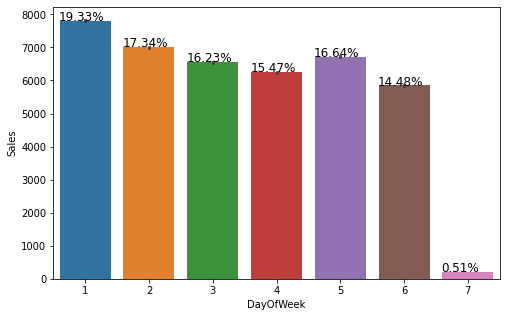

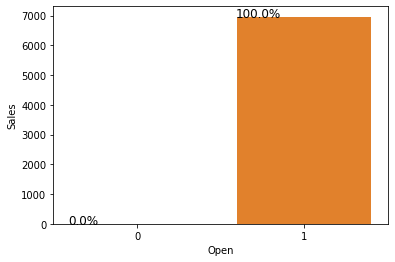

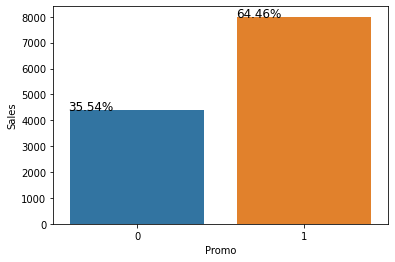

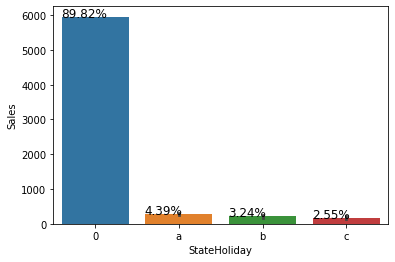

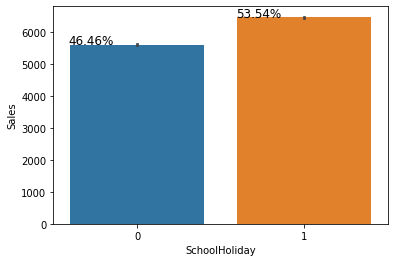

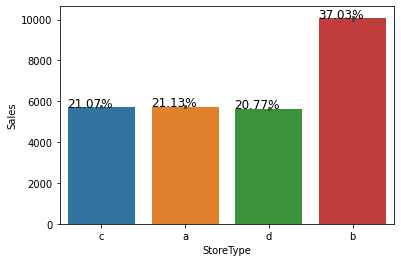

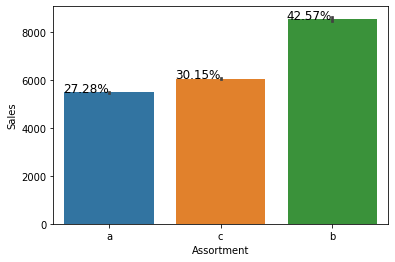

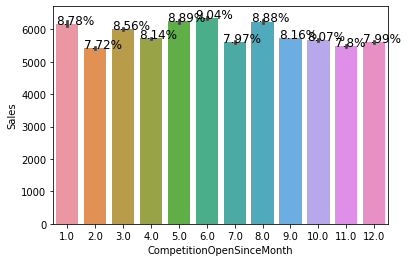

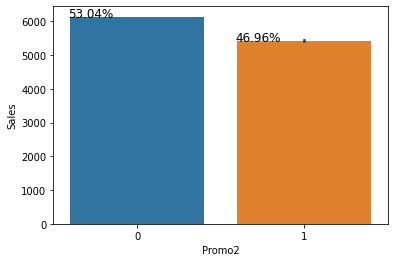

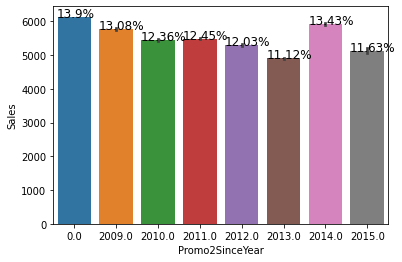

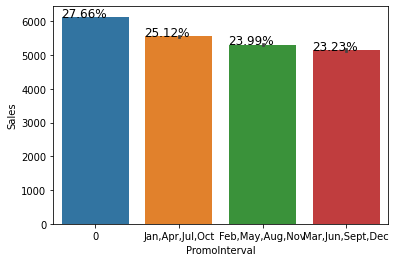

In [42]:
# visualisation of categorical variables against sales
plt.figure(figsize=(8,5))
for feature in new_categorical_features:
  data_df=dataset.copy()
  ax = sns.barplot(data = data_df, x=feature, y='Sales')
  plt.xlabel(feature)
  plt.ylabel('Sales')
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

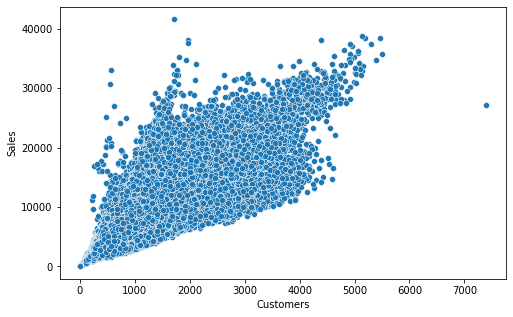

In [43]:
# creating a scatterplot to check correlation between customer and sales
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x='Customers', y='Sales')

It is pretty obvious there is going to be a positive 
correlation between customers and sales. There are a 
few outliers. 

In [44]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

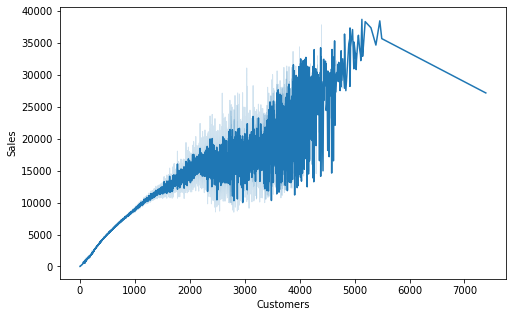

In [45]:
# creating a lineplot to check correlation between customer and sales
plt.figure(figsize=(8,5))
sns.lineplot(data=dataset, x="Customers", y="Sales")

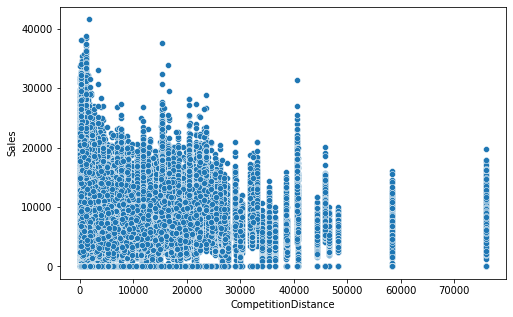

In [46]:
# a scatterplot to check whether or not CompetitionDistance and Sales are correlated
plt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x='CompetitionDistance', y='Sales')

Most stores have competition distance within the range 
of 0 to 10 kms and had more sales than stores far 
away.


**Observation from above plots:**

*   It varifies our assumption that Mondays are days with most sales, and Sundays are ones with least.
* Stores with assortment level b offers contributes highest average sales.
*   Stores peform a lot well when Promo is running.
*  Seems like less stores are open on State Holidays, hence less average sales are recorded.
*   On school holidays, sales are comparatively higher.
*   Store type b has highest average sales.
*   Average sales are low when Promo2 is running, we will try finding reasons for that, one assumption is stores were participating less.
*   As assumed customer and sales has positive correlation, except for some rare outliers.
*   Opposite to intuition Sales and Competition distance are actually negatively correlated, and stores having less competition distance actually has more sales.








In [47]:
#creating copy of dataset
data_df=dataset.copy()

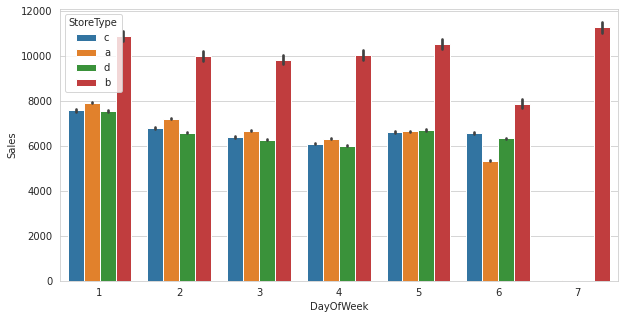

In [48]:
#barplot for average sales for each day of week for each store type
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
sns.barplot(data=data_df, x='DayOfWeek', y='Sales', hue='StoreType')

It can be observed that except store type b, almost all other store type were mostly closed on Sundays

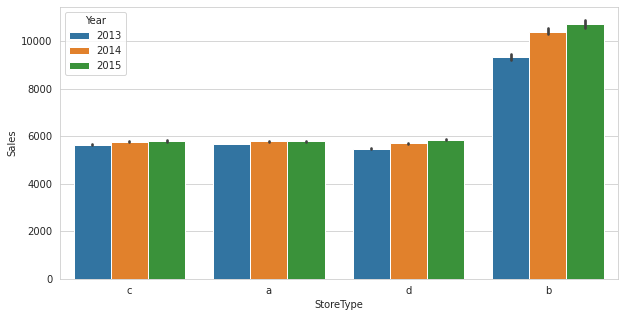

In [49]:
#Exploring relationship between StoreType and Year with reference to Sales
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
sns.barplot(data=data_df, x='StoreType', y='Sales', hue='Year')

This explains sales of storetype b is increasing year on year and always higher compared to other storetype.

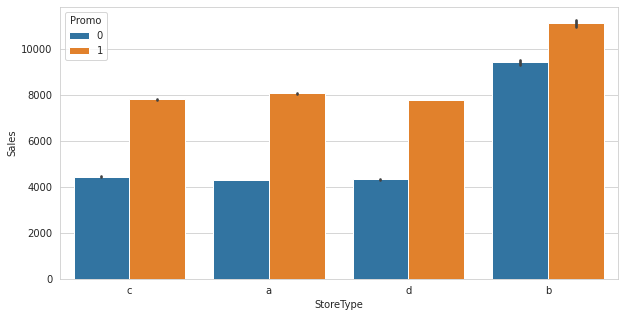

In [50]:
#Exploring relationship between StoreType and Promo with reference to Sales
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
sns.barplot(data=data_df, x='StoreType', y='Sales', hue='Promo')

This explains promotion leads to more sales in all the storetype.

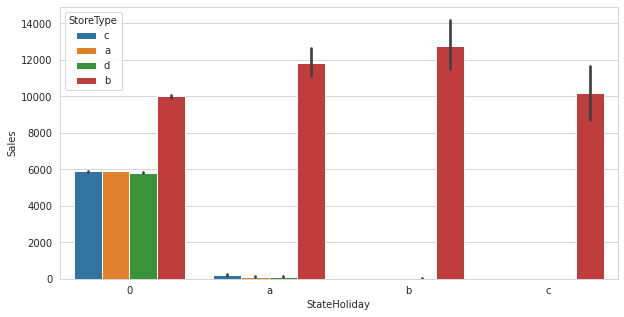

In [51]:
#Exploring relationship between StoreType and Stateholiday with reference to Sales
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
sns.barplot(data=data_df, x='StateHoliday', y='Sales', hue='StoreType')

This visualisation shows except store type b, almost all other store type were mostly closed on Stateholidays

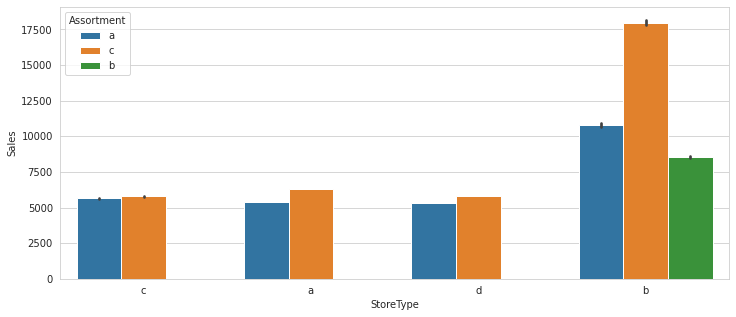

In [52]:
#Exploring relationship between StoreType and Assortment with reference to Sales
plt.figure(figsize=(12,5))
sns.barplot(data=data_df, x='StoreType', y='Sales', hue='Assortment')

This explains why storetype b had the best average sales of all other store types, it has three assortments available, and also this was the only storetype open even on sundays.

In [53]:
# customer distribution over Storetypes.
data_df.groupby('StoreType')['Customers'].sum().sort_values(ascending=False).reset_index()

,StoreType,Customers
0,a,363541434
1,d,156904995
2,c,92129705
3,b,31465621


In [54]:
# Sales and customer distribution over store types.
graph_dist= data_df.groupby('StoreType')['Customers','Sales'].sum().sort_values(by=['Customers','Sales'],ascending=False).reset_index()
graph_dist

,StoreType,Customers,Sales
0,a,363541434,3165334859
1,d,156904995,1765392943
2,c,92129705,783221426
3,b,31465621,159231395


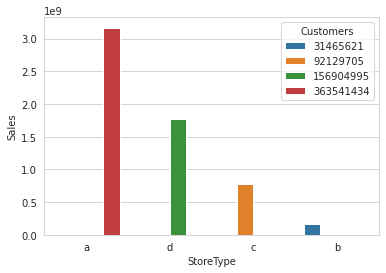

In [55]:
sns.barplot(data=graph_dist, x='StoreType',y='Sales', hue='Customers')

Seems like Store a has maximum number of customers and most revenue overall as well.

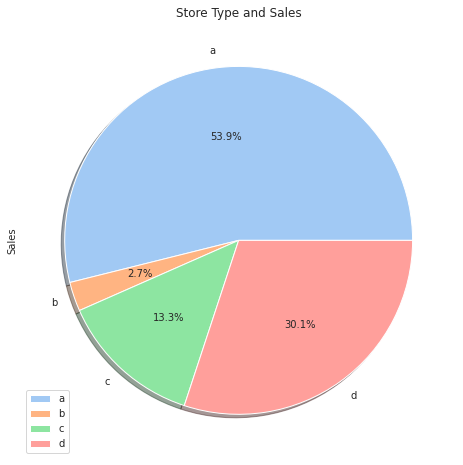

In [56]:
# visualisation of storetype with sales using pieplot
plt.figure(figsize=(8, 8))
data_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel')[0:5])

Storetype a accounts for around 54 percent of all Sales happening in data. Let's try visualising number of customers in each store type.

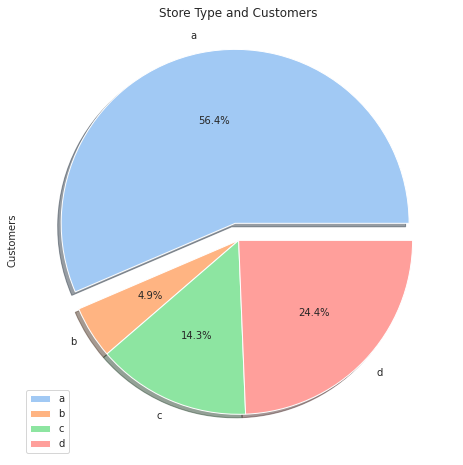

In [57]:
# visualisation of storetype with customer using pieplot
plt.figure(figsize=(8, 8))
explode = [0.1,0,0,0]
data_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Store Type and Customers', legend=True, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel')[0:5], explode=explode)


Here also, StoreType a has highest share of customers, i.e, around 56 percent, after that comes store type d, then c and b respectively

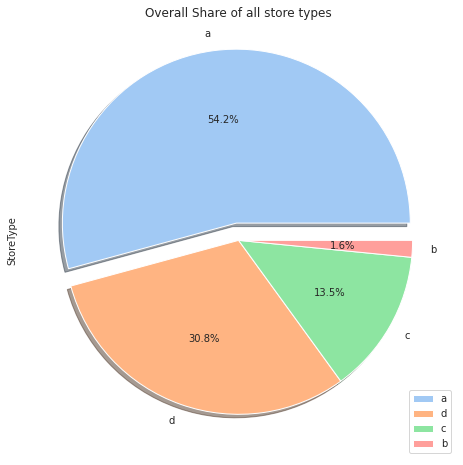

In [58]:
# overall share of stores in entire data
plt.figure(figsize=(8, 8))
data_df["StoreType"].value_counts().plot.pie(title='Overall Share of all store types', legend=True, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel'),explode=explode)

Some conclusions from pie charts:

*   Even after having only 1.6% of share of total number of storetypes StoreType b has around 4.9 percent customer share and about 3 percent share in overall sales, that might be one reason why average sales for StoreType b was higher than others, also StoreType b is only storetype with all three assortments.
*   StoreType a has highest overall share of around 54%, and it contributes about 54% to overall sales with 56% of customer share. That is a fair reason to conclude why it has highest revenue numbers.
*   Store type c is comparatively linear comprising around 14% of all store counts with around same percentage share of customers and slighly less share to overall sales around 13%.
*   StoreType d has second highest share in overall number of stores with around 31% share as well as it has 24% share of customers which contributes to 30% of all sales. It can be concluded that per customer sales for store type d must be highest.









In [59]:
# Finding average sales per customer for each store type
storetypes = ['a','b','c','d']
for i in storetypes:
  avg_sales_per_cust =round((data_df[data_df['StoreType']==i]['Sales'].sum()/data_df[data_df['StoreType']==i]['Customers'].sum()),2)
  print(f'Average sales per customer for StoreType {i} is {avg_sales_per_cust}')
 

Average sales per customer for StoreType a is 8.71
Average sales per customer for StoreType b is 5.06
Average sales per customer for StoreType c is 8.5
Average sales per customer for StoreType d is 11.25


We can see Average sales per customer for StoreType d is 11.25, maximum.

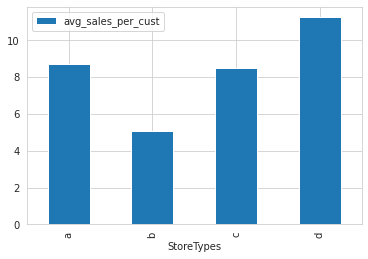

In [60]:
# barplot showing average sales percustomer for all 4 storetypes
pd.DataFrame({'StoreTypes':['a','b','c','d'],'avg_sales_per_cust':[8.71,5.06,8.5,11.25]}).set_index('StoreTypes').plot(kind='bar')

In [63]:
#creating a copy for quaterly sales
data_quarter=data_df.copy()

In [64]:
quaterly_sales= data_quarter.groupby(pd.PeriodIndex(data_quarter.Date, freq='Q'))['Sales'].sum().reset_index()
quaterly_sales

,Date,Sales
0,2013Q1,552846851
1,2013Q2,549544846
2,2013Q3,584940572
3,2013Q4,615543815
4,2014Q1,559697318
5,2014Q2,579285285
6,2014Q3,502157350
7,2014Q4,539664943
8,2015Q1,582750871
9,2015Q2,594426156


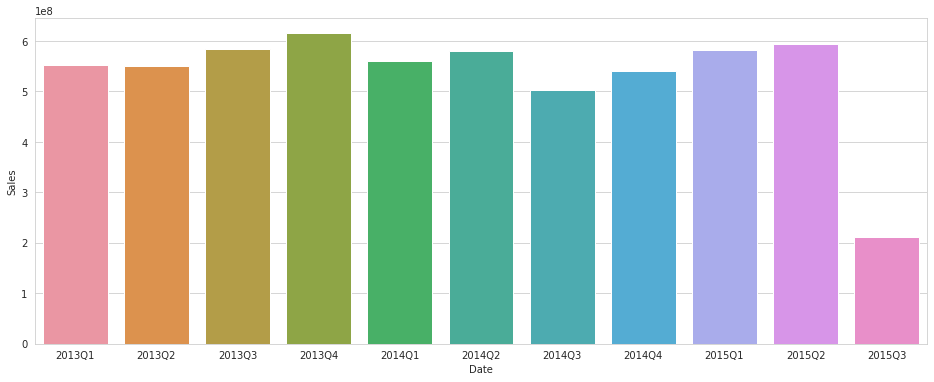

In [65]:
plt.figure(figsize=(16, 6))
sns.barplot(data=quaterly_sales, x='Date',y='Sales')

In [62]:
# creating df for month wise sales over the years
sales_2013 = data_df[data_df['Year']==2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = data_df[data_df['Year']==2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = data_df[data_df['Year']==2015].groupby('Month')['Sales'].sum().reset_index()

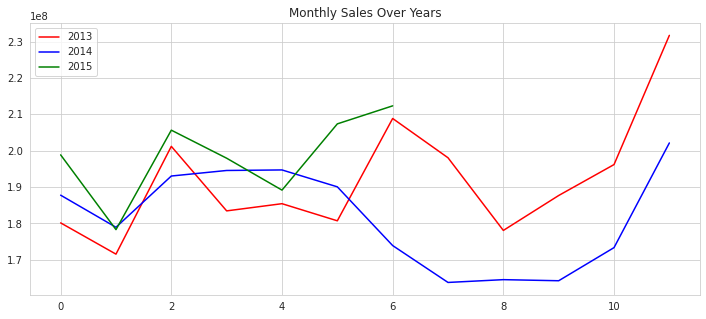

In [66]:
#plotting
plt.figure(figsize=(12,5))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

There is a significant drop in sales for around two months in 2014 data, it might be due to shops closed for refurbishment

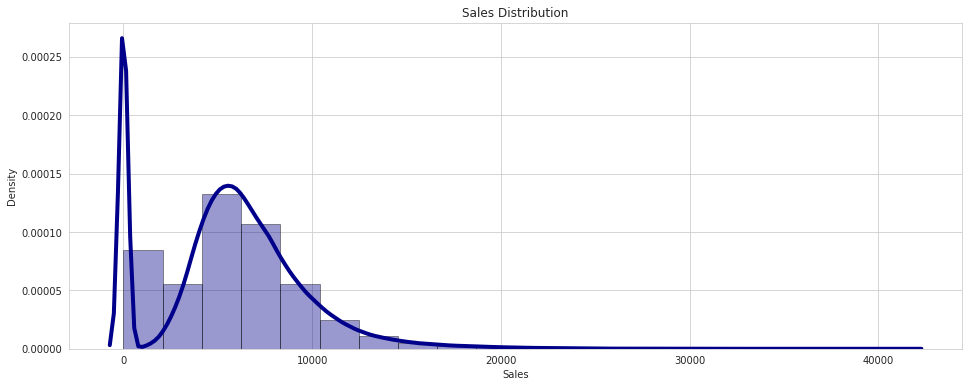

In [67]:
# This is time to check Sales distribution over the data.
plt.figure(figsize=(16, 6))
sns.distplot(data_df['Sales'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title("Sales Distribution")
plt.show()

The drop in sales in because of those stores which were closed for refurbishment, this drop was seen in monthly sales over years in year 2014 as well. Also it is observed the data is right skewed.

Text(0.5, 1.0, 'Customer Distribution')

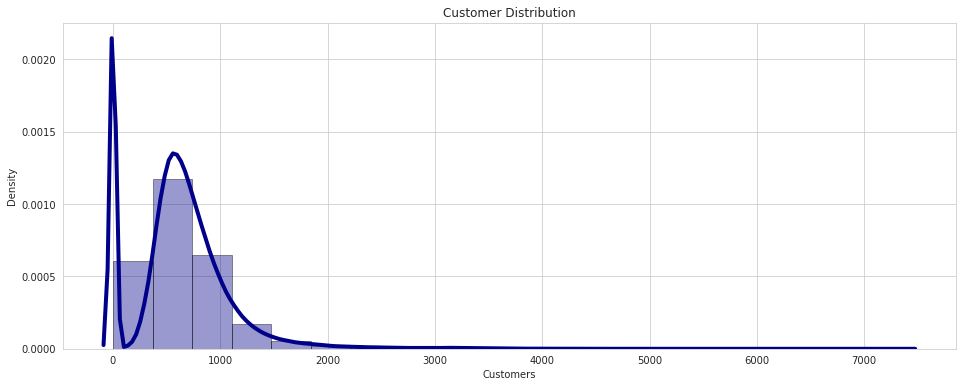

In [68]:
#distribution to see customer distribution over data
plt.figure(figsize=(16, 6))
sns.distplot(data_df['Customers'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title("Customer Distribution")


Same drop of customer due to stores closed for refurbishment in the months of 2014 was seen.

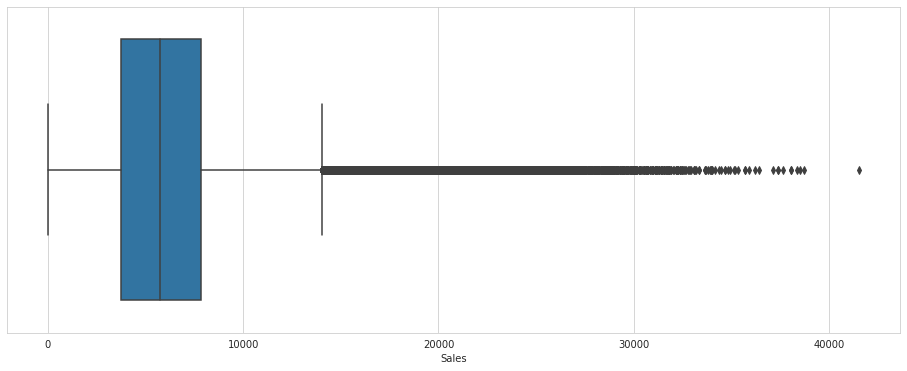

In [69]:
# Visualisation of outliers in Sales column
plt.figure(figsize=(16, 6))
sns.boxplot(x=data_df["Sales"])

There are a lot of outliers in Sales column.

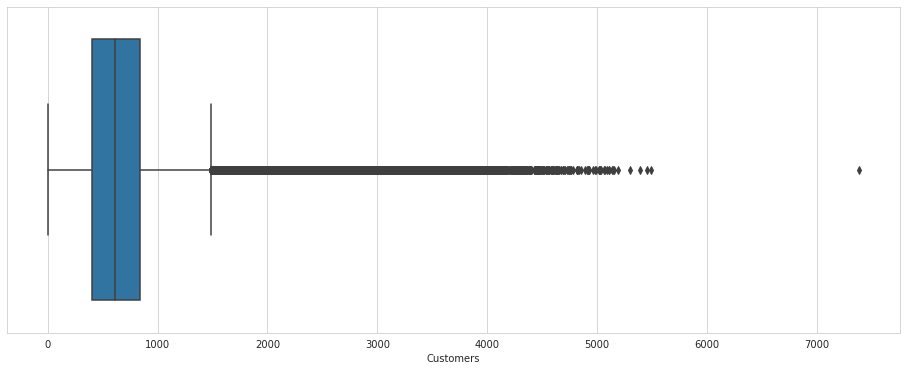

In [70]:
# Visualisation of outliers in Customer column
plt.figure(figsize=(16, 6))
sns.boxplot(x=data_df["Customers"])

Only thing that could justify Outliers in Sales and Customers data is huge surge in Customer purchases during Festival seasons and promo times.

In [71]:
# we need to drop some unrelated columns.
df_corr = data_df.drop(['Store', 'Date', 'Year', 'WeekOfYear', 'DayOfYear'], axis=1)
df_corr.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7
1,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7
2,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
3,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7
4,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7


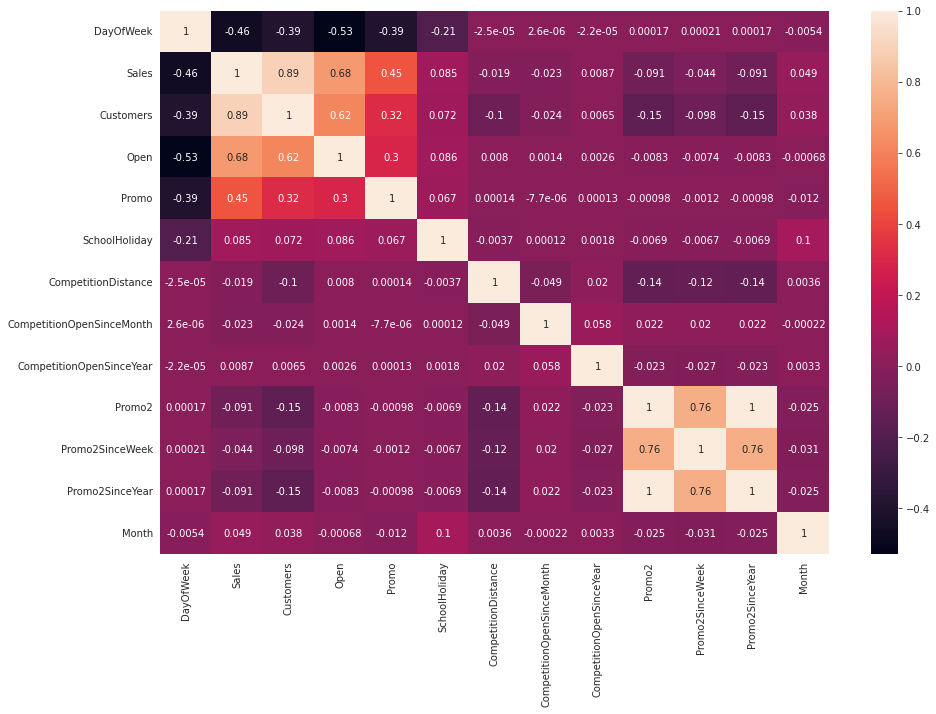

In [72]:
# Creating a correlation matrix to see correlation between different columns, i.e, checking Multicollinearity.
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_corr.corr(), annot=True)

**Key takeaways from heatmap:**

*   DayOfWeek and sales are negatively correlated, that makes sense, since overall average sales decreases as week moves from Monday to Sunday.
*   Customers and Sales has high correlation.
*   Open and Sales has good correlation.
*   Promo and sales has good correlation as well.
*   Competition Distance and Sales has negative correlation.
*   Multicollinearity can be seen in data, with Columns Promo2, Promo2SinceWeek, Promo2SinceYear being highly collinear to each other.







**Feature Engineering and Data Cleaning/Manipulation**

In [73]:
data_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [74]:
len(data_df[data_df.duplicated()])

0

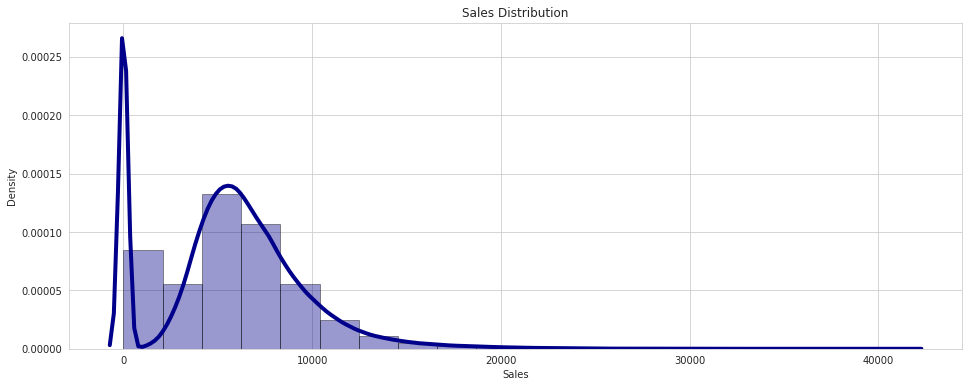

In [75]:
#distplot for dependent variable sales as we saw before also
plt.figure(figsize=(16, 6))
sns.distplot(data_df['Sales'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title("Sales Distribution")
plt.show()


sales are 0 for those 54 days when shops were closed for refurbishnments, and maybe some other holidays.

In [76]:
#getting number of rows where sales are zero
data_df[data_df.Sales==0].shape

(172871, 22)

In [77]:
#getting number of days when stores were not open
data_df[data_df.Open==0].shape

(172817, 22)

So, stores registered zero sales on days on which they were not open. We can remove these rows.

In [78]:
data_df1 = data_df[data_df['Open']!=0]
data_df1.drop(columns=['Open'], inplace=True)

In [79]:
data_df1.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212


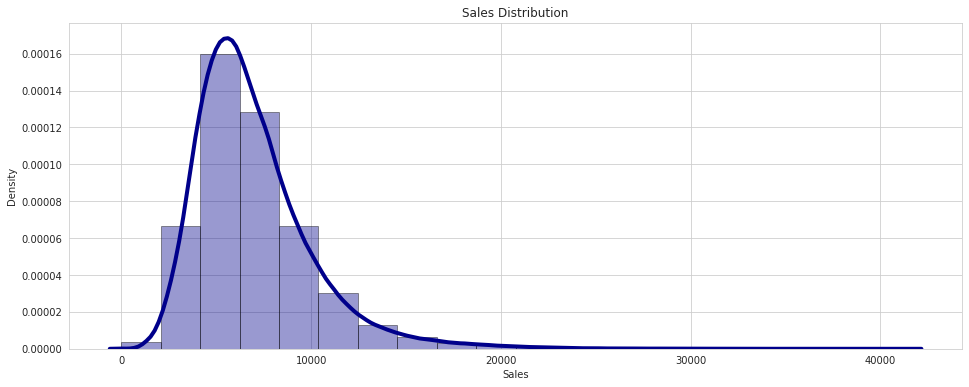

In [80]:
# let's check sales distribution again
plt.figure(figsize=(16, 6))
sns.distplot(data_df1['Sales'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title("Sales Distribution")
plt.show()

In [81]:
# Sales distribution is right skewed, let's try applying log transformation upon it
data_df1['Sales'] = np.log(data_df1['Sales'])

In [82]:
data_df1.dropna(inplace=True)

In [83]:
data_df1.drop(data_df1[data_df1['Sales'] == float("-inf")].index,inplace=True)

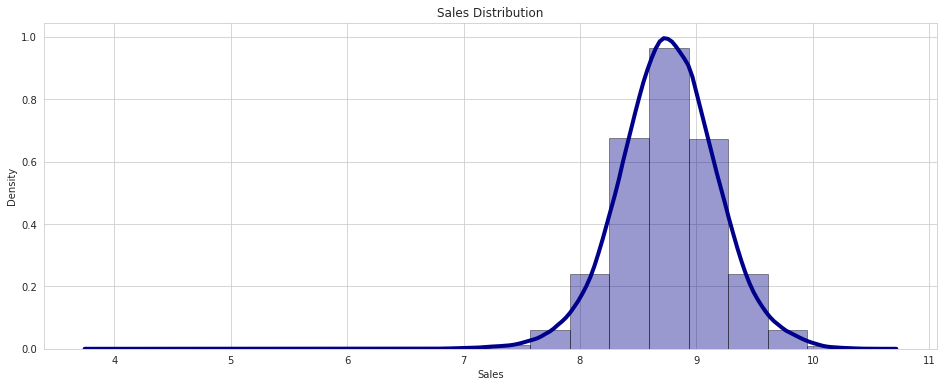

In [84]:
# let's check sales distribution again
plt.figure(figsize=(16, 6))
sns.distplot(data_df1['Sales'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.title("Sales Distribution")
plt.show()

In [85]:
data_df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [86]:
#replacing categorical values in StateHolidays
data_df1.replace('StateHoliday',{'a':1,'b':1,'c':1},inplace=True)

**Detecting outlier using Z score**

Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [87]:
#Time to detect outliers in Sales column using Z-score. It is observed that there are too many of them in Sales column, below code will find out what are those.
mean_sales = np.mean(data_df1['Sales']) #mean
sd_sales = np.std(data_df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in data_df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
        #total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

Total number of Outliers present in the Sales column are 1559.


In [88]:
outliers.sort()
outliers[0]

10.033550436834297

[Text(0.5, 1.0, 'Outliers Distribution')]

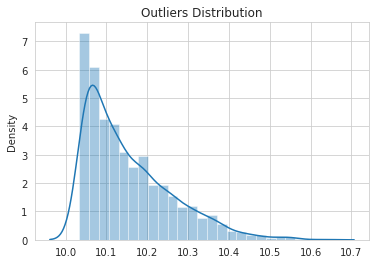

In [89]:
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

We can see a slight deviation at datapoint 10.033, maybe after that outliers are present.

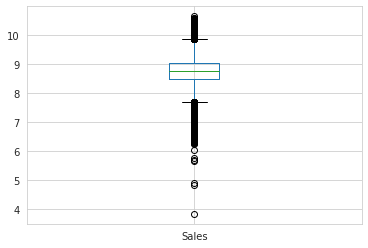

In [90]:
#Checking the outlier using boxplot
figure=data_df1.boxplot(column="Sales")

In [91]:
#first store index of outlier after sorting the dataset
dataset.iloc[262280]

Store                                        788
DayOfWeek                                      4
Date                         2014-12-04 00:00:00
Sales                                      22778
Customers                                   1973
Open                                           1
Promo                                          1
StateHoliday                                   0
SchoolHoliday                                  0
StoreType                                      a
Assortment                                     c
CompetitionDistance                       1530.0
CompetitionOpenSinceMonth                    3.0
CompetitionOpenSinceYear                  2013.0
Promo2                                         0
Promo2SinceWeek                              0.0
Promo2SinceYear                              0.0
PromoInterval                                  0
Year                                        2014
Month                                         12
WeekOfYear          

In [92]:
#percentage of sales greater than 10.2
sales_outliers = data_df1[data_df1['Sales']> 10.033399252722075]
percentage_of_outliers = (len(sales_outliers)/len(data_df1))*100
#print
print(f'The percentage of observations of sales greater than 22778 are {percentage_of_outliers}')

The percentage of observations of sales greater than 22778 are 0.18464169562426422


In [93]:
#exploring the reasons behind this behaviour
sales_outliers.sort_values(by=['Sales'])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
262280,788,4,2014-12-04,10.033550,1973,1,0,0,a,c,1530.0,3.0,2013.0,0,0.0,0.0,0,2014,12,49,338
619550,396,1,2013-12-23,10.033550,2142,0,0,1,a,c,23130.0,9.0,2013.0,0,0.0,0.0,0,2013,12,52,357
703596,817,3,2013-10-09,10.033814,3221,1,0,1,a,a,140.0,3.0,2006.0,0,0.0,0.0,0,2013,10,41,282
248255,788,5,2014-12-19,10.033814,1890,1,0,0,a,c,1530.0,3.0,2013.0,0,0.0,0.0,0,2014,12,51,353
704407,513,2,2013-10-08,10.033814,2570,1,0,1,a,a,400.0,8.0,2013.0,0,0.0,0.0,0,2013,10,41,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424086,57,1,2014-06-16,10.546315,1970,1,0,0,d,c,420.0,6.0,2014.0,0,0.0,0.0,0,2014,6,25,167
87231,262,4,2015-05-14,10.554953,5192,0,a,1,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,5,20,134
101726,262,5,2015-05-01,10.557998,5458,1,a,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,5,18,121
132946,262,5,2015-04-03,10.564163,5132,1,b,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,4,14,93


In [94]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5836,262,7,2015-07-26,10.390440,4783,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
13641,262,7,2015-07-19,10.362967,4691,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,29,200
21446,262,7,2015-07-12,10.381924,4623,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,28,193
29251,262,7,2015-07-05,10.317417,4762,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,27,186
37056,262,7,2015-06-28,10.268721,4450,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,6,26,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979561,262,7,2013-02-03,10.272323,4144,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2013,2,5,34
987366,262,7,2013-01-27,10.072851,3612,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2013,1,4,27
995171,262,7,2013-01-20,10.098725,3607,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2013,1,3,20
1002976,262,7,2013-01-13,10.043728,3541,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2013,1,2,13


We have already seen in our eda part that even on Sundays, StoreType b is usually open, which cintributes to their higher average sales overall, that is one the reasons why they contribute so much to outliers. Also, most of the datapoints has Promo going on.

In [95]:
#let's verify in the full dataset
data_df1.loc[(data_df1['DayOfWeek']==7) & (data_df1['StoreType']=='b')]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5659,85,7,2015-07-26,9.343209,1606,0,0,0,b,a,1870.0,10.0,2011.0,0,0.0,0.0,0,2015,7,30,207
5833,259,7,2015-07-26,9.680219,2857,0,0,0,b,b,210.0,9.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5836,262,7,2015-07-26,10.390440,4783,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5848,274,7,2015-07-26,8.955448,1608,0,0,0,b,b,3640.0,9.0,2013.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
5909,335,7,2015-07-26,8.985696,1509,0,0,0,b,a,90.0,9.0,2013.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011201,682,7,2013-01-06,8.736811,1077,0,0,0,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1,6
1011252,733,7,2013-01-06,9.325988,2584,0,0,0,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1,6
1011288,769,7,2013-01-06,8.852951,1764,0,0,0,b,b,840.0,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,6
1011467,948,7,2013-01-06,8.703507,1402,0,a,0,b,b,1430.0,9.0,2013.0,0,0.0,0.0,0,2013,1,1,6


This dataframe only varifies our earlier hypothesis that storetype b contributes most to sales outliers.

In [96]:
data_df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [97]:
#replacing categorical values in StateHolidays
#changing into boolean 
data_df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [98]:
#combining competition open since month and year into total months
data_df1['CompetitionOpen'] = (data_df1['Year'] - data_df1['CompetitionOpenSinceYear'])*12 + (data_df1['Month'] - data_df1['CompetitionOpenSinceMonth'])
#correcting the negative values
data_df1['CompetitionOpen'] = data_df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
data_df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [99]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
data_df1['Promo2Open'] = (data_df1['Year'] - data_df1['Promo2SinceYear'])*12 + (data_df1['WeekOfYear'] - data_df1['Promo2SinceWeek'])*0.230137

#correcting the negative values
data_df1['Promo2Open'] = data_df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*data_df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if data_df1['Month'] and month_dict[data_df1['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
data_df1['Promo2running'] = data_df1.apply(promo2running,axis=1)*data_df1['Promo2']

#Dropping unecessary columns
data_df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [100]:
data_df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear', 'CompetitionOpen', 'Promo2Open', 'Promo2running'],
      dtype='object')

In [101]:
#setting date and store as index
data_df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
data_df1.sort_index(inplace=True)

In [102]:
data_df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


**Outlier Treatment**

*   Treating outliers in Sales and Customers will impact our predictions as the outliers are actual business during promo days and festive season
*   Becuase, Sales have outliers due to StoreType b being open even on Sundays.
*   Also, a lot of days which are contributing to outliers have Promo going on, which makes justifies their higher sales.
*   Treating outliers will only result in reduced prediction accuracy and while a model might fit well on train data, it will have high variance on Test data.











In [103]:
# just for safety
data_df2=data_df1.copy()

## **Model Selection:**

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few. 

**Train-Test Split**

In [104]:
data_df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


In [105]:
data_df2.tail(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2015-07-31,1115,5,9.068777,538,1,0,1,d,c,5350.0,1,2015,7,31,212,22.0,38.071233,0


In [106]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = data_df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = data_df2.loc[start_test:end_test]

In [107]:
#csv
df_train1 = df_train.to_csv("/content/drive/MyDrive/Retail Sales Prediction/df_train.csv")
df_test2 = df_test.to_csv("/content/drive/MyDrive/Retail Sales Prediction/df_test.csv")

In [108]:
df_train

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   
...                     ...       ...        ...    ...           ...   
2015-06-14 948            7  9.342946       2396      0             0   
           1045           7  8.214736        494      0             0   
           1081           7  8.658866        933      0             0   
           1097           7  9.531554       2960      0             0   
           1099           7  8.468213        675      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-06-14 948                0         b          b               1430.0   
           1045               0         a          c              26990.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   
           1099               0         a          c                200.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-06-14 948         0  2015      6          24        165             21.0   
           1045        0  2015      6          24        165             18.0   
           1081        0  2015      6          24        165            111.0   
           1097        0  2015      6          24        165            159.0   
           1099        1  2015      6          24        165             26.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85        0.00000              0  
           259       0.00000              0  
           262       0.00000              0  
           274       0.00000              0  
           335       0.00000              0  
...                      ...            ...  
2015-06-14 948       0.00000              0  
           1045      0.00000              0  
           1081      0.00000              0  
           1097      0.00000              0  
           1099     26.30137              0  

[798486 rows x 17 columns]

In [109]:
# dividing train df into train_x and train_y 
x_train = df_train.drop('Sales', axis=1)
y_train = df_train[['Sales']]

#dividing test df into test_x and test_y
x_test = df_test.drop("Sales", axis=1)
y_test = df_test[['Sales']]

In [110]:
print(f'The shape of X_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 16)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 16)
The shape of y_test is: (45852, 1)
